In [1]:
import numpy as np
import matplotlib.pyplot as plt

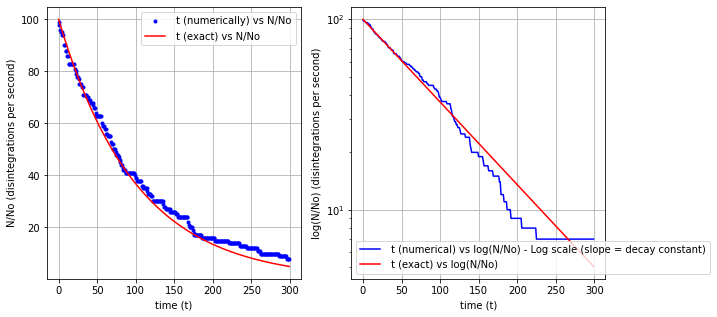

In [32]:

## Question 1 (a) ##

alpha = 0.01   # decay constant
t = 1 # this is delta t
p = alpha*t     # probability of decay when 
q = 1-p      # total probability is 1, so this is the survival probability
n1 =100
T=300
 
def Decay1(N):                 
    pop = []
    for t in range(T):
        r = np.random.random(N)
        survive = np.sum(r<q)          # surviving atoms
        pop.append(survive)
        N = survive
    return pop

plt.figure(figsize =(10,5))


plt.subplot(1,2,1)
plt.plot(range(T),Decay1(n1),'b.', label = ' t (numerically) vs N/No') 

analyticals = []
for i in range(T):
    analyticals.append(n1*np.exp(-alpha*i))
plt.plot(range(T),analyticals,'-r',label = ' t (exact) vs N/No' ) 
plt.xlabel('time (t)')
plt.ylabel('N/No (disintegrations per second)')
plt.legend() 
plt.grid()



plt.subplot(1,2,2)





plt.semilogy()
plt.plot(range(T),Decay1(n1),'b',label = ' t (numerical) vs log(N/No) - Log scale (slope = decay constant)')
plt.semilogy()
plt.plot(range(T),analyticals,'-r', label = ' t (exact) vs log(N/No)' ) 
plt.xlabel('time (t)')
plt.ylabel('log(N/No) (disintegrations per second)')
plt.legend()
plt.grid()

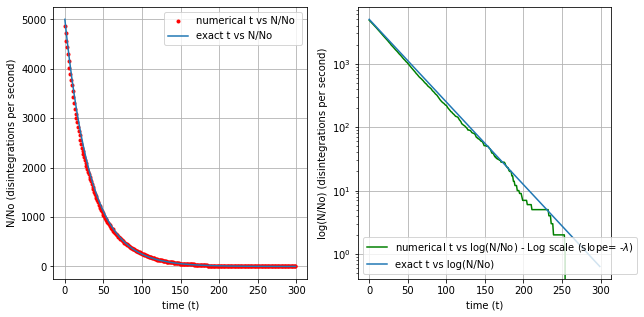

In [14]:
## Question 1 (b) ##

alpha2 = 0.03
p2 = alpha2          
q2 = 1-p2    
n2 =5000
T=300


def Decay2(N):                 
    population = []
    for t in range(T):
        r = np.random.random(N)
        survive = np.sum(r<q2)          
        population.append(survive)
        N = survive
    return population
      

plt.figure(figsize =(10,5))

plt.subplot(1,2,1)
plt.plot(range(T),Decay2(n2),'r.',label = 'numerical t vs N/No ')  

analyticals = []
for i in range(T):
    analyticals.append(n2*np.exp(-alpha2*i))
plt.plot(range(T),analyticals,label = 'exact t vs N/No' ) 

plt.xlabel('time (t)')
plt.ylabel('N/No (disintegrations per second)')
plt.legend() 
plt.grid()




plt.subplot(1,2,2)
plt.semilogy()
plt.plot(range(T),Decay2(n2),'g-',label = 'numerical t vs log(N/No) - Log scale (slope= -$\lambda$)')
plt.semilogy()
plt.plot(range(T),analyticals,label = 'exact t vs log(N/No)' ) 
plt.grid()
plt.xlabel('time (t)')
plt.ylabel('log(N/No) (disintegrations per second)')
plt.legend()




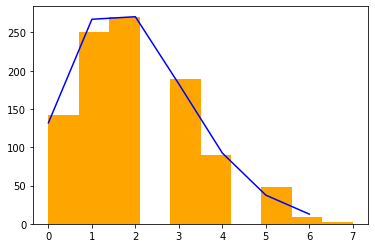

In [24]:

## Question 2 (a) ## 

distribution = []
N = 500
def decays(N):
    alphas = 4*10**(-5)   # decay constant
    delta_t = 10
    p = delta_t*alphas           # decay probablity for delta t =1
    q = 1-p      # survival probablity
    
    T=100
    jump = int(T/delta_t)    
    populations = []
    for t in range(jump):
        r = np.random.random(N)
        survive = np.sum(r<q)          # surviving atoms
        populations.append(survive)
        N = survive
    return populations
      



for i in range(1000):
    p = decays(N)
    distribution.append(N-p[-1])

plt.hist(distribution,color='orange')
avgerage_distribution = np.mean(distribution)
from scipy.stats import poisson  # we have used the poisson function from SciPy
x = np.arange(0,7,1)
y = 1000*poisson.pmf(x, mu =avgerage_distribution)
plt.plot(x,y, 'blue')

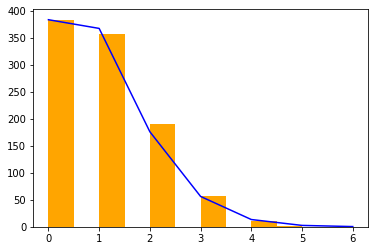

In [28]:

## Question 2 (b) ##

distribution = []

def decays(N):
    alphas = 2*10**(-5)   # it is the decay constant
    delta_t = 10
    p = delta_t*alphas           # decay probablity for delta t =1
    q = 1-p      # survival probablity
    
    T=100
    jump = int(T/delta_t)    
    populations = []
    for t in range(jump):
        r = np.random.random(N)
        survive = np.sum(r<q)          # number of atoms survived
        populations.append(survive)
        N = survive
    return populations
      



for i in range(1000):
    p = decays(N)
    distribution.append(N-p[-1])
    
    
    
    
plt.hist(distribution,color='orange')
avgerage_distribution = np.mean(distribution)
from scipy.stats import poisson
x = np.arange(0,7,1)
y = 1000*poisson.pmf(x, mu =avgerage_distribution)
plt.plot(x,y, 'blue')

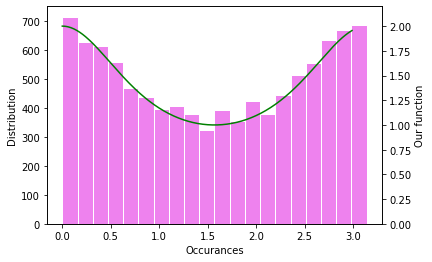

In [46]:
## Question 3 (a) ##

def DistF(u): # distribution function
    return(np.arctan(np.sqrt(0.5)*np.tan((u-1)*np.pi)))

DistF(0)
#DistFunction(1)
N=np.random.rand(10000)
def Func1(th):
    return(1/(np.sin(th)**2+0.5*np.cos(th)**2))

fig,ax1=plt.subplots()
Y=DistF(np.random.rand(10000))
for i in range(10000):
    if Y[i]<0:
        Y[i]=Y[i]+np.pi
X=np.arange(0,3,0.01)
Curve=Func1(X)
ax1.hist(Y,color='violet',edgecolor='white',bins=20)

ax1.set_xlabel('Occurances')
ax1.set_ylabel('Distribution')
ax2=ax1.twinx()
ax2.plot(X,Curve,linestyle='-',color='green')
ax2.set_ylim(0,2.2)
ax2.set_ylabel('Our function')
plt.show()

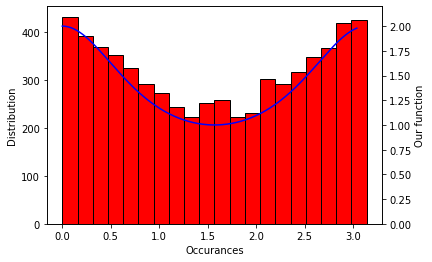

In [45]:
## Question 3 (b) ##

U1= np.random.rand(10000)
U2= np.random.rand(10000)
Y=[]
for i in range(10000):
    if Func1(np.pi*U1[i])>=U2[i]*2.25:
        Y.append(np.pi*U1[i])
fig,ax1=plt.subplots()
ax1.hist(Y,color='red',edgecolor='black',bins=20)
ax1.set_xlabel('Occurances')
ax1.set_ylabel('Distribution')
ax2=ax1.twinx()
X=np.arange(0,3.05,0.01)
Curve=Func1(X)
ax2.plot(X,Curve,linestyle='-',color='blue')
ax2.set_ylim(0,2.2)
ax2.set_ylabel('Our function')
plt.show()